In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cmap = plt.cm.tab10

In [2]:
data = pd.read_csv("dataset/german_credit_data.csv", index_col=0)


In [3]:
def is_numeric(dtype):
    return dtype in [np.float32, np.float64, np.uint8, np.uint16, np.uint32, np.uint64, np.int8, np.int16, np.int32, np.int64]

In [4]:
def replace_na_with_mean_mode(df):
    out = pd.DataFrame(df)
    for col in df.columns:
        if is_numeric(df[col].dtype):
            out.loc[out[col].isna(), col] = df[col].mean()
        else:
            out.loc[out[col].isna(), col] = df[col].mode().iat[0]
    return out
            


In [5]:
na_replaced = replace_na_with_mean_mode(data)

In [6]:
count_na = {column:na_replaced[column].isna().sum() for column in na_replaced.columns}
count_na

{'Age': 0,
 'Sex': 0,
 'Job': 0,
 'Housing': 0,
 'Saving accounts': 0,
 'Checking account': 0,
 'Credit amount': 0,
 'Duration': 0,
 'Purpose': 0}

<AxesSubplot:>

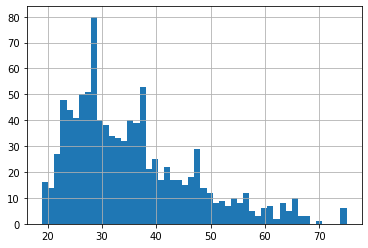

In [7]:
na_replaced.Age.hist(bins=50)

In [8]:
def std_normalization(series):
    return (series - series.mean())/series.std()

In [9]:
age_normalized = std_normalization(na_replaced.Age)

<AxesSubplot:>

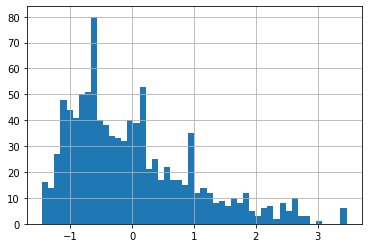

In [11]:
age_normalized.hist(bins=50)

In [12]:
age_normalized.mean()

4.9737991503207014e-17

In [13]:
age_normalized.std()

0.9999999999999999

In [15]:
credit_amount_normalize = std_normalization(na_replaced["Credit amount"])

<AxesSubplot:>

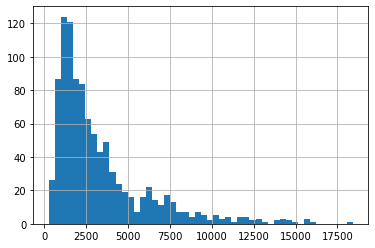

In [19]:
na_replaced["Credit amount"].hist(bins=50)

<AxesSubplot:>

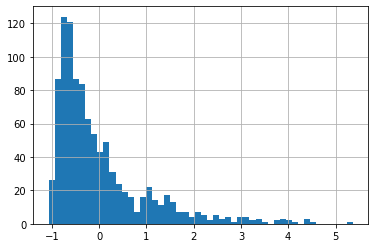

In [18]:
credit_amount_normalize.hist(bins=50)

In [20]:
duration_normalize = std_normalization(na_replaced["Duration"])

<AxesSubplot:>

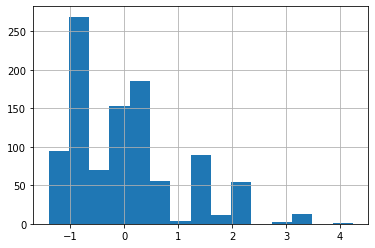

In [21]:
duration_normalize.hist(bins=15)